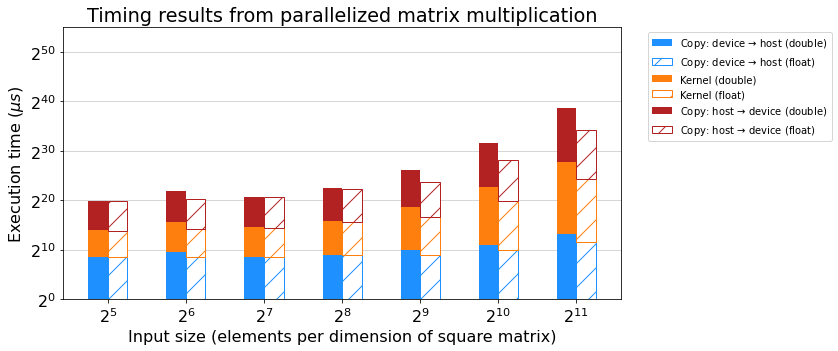

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 16})
from math import log
import pandas as pd
import numpy as np


# time is in millionths of seconds (microseconds)

y_transform = np.log2

sizes = [32, 64, 128, 256, 512, 1024, 2048]
sizes = [
    f"$2^{{{str(int(log(s, 2)))}}}$" for s in sizes
]
filename = "double"
data = pd.read_csv(f"{filename}.csv", header=None)
copy_hosttodevice = y_transform(data[0])
kernel = y_transform(data[1])
copy_devicetohost = y_transform(data[2])

filename = "float"
data = pd.read_csv(f"{filename}.csv", header=None)
copy_hosttodevice_float = y_transform(data[0])
kernel_float = y_transform(data[1])
copy_devicetohost_float = y_transform(data[2])


plt.grid(axis='y', color="#cccccc")

barWidth = 0.25
br1 = np.arange(len(sizes))
br2 = [x + barWidth for x in br1]

plt.bar(br1, copy_hosttodevice, color='dodgerblue', label="Copy: device $\\to$ host (double)", zorder=3, width=barWidth)
plt.bar(br2, copy_hosttodevice_float, edgecolor='dodgerblue', color="white", hatch="/", label="Copy: device $\\to$ host (float)", zorder=3, width=barWidth)

plt.bar(br1, kernel, bottom=copy_hosttodevice, color='tab:orange', label="Kernel (double)", zorder=3, width=barWidth)
plt.bar(br2, kernel_float, bottom=copy_hosttodevice_float, edgecolor='tab:orange', hatch="/", color="white", label="Kernel (float)", zorder=3, width=barWidth)

bottom = [x + y for (x, y) in zip(copy_hosttodevice, kernel)]
plt.bar(br1, copy_devicetohost, bottom=bottom, color='firebrick', label="Copy: host $\\to$ device (double)", zorder=3, width=barWidth)

bottom = [x + y for (x, y) in zip(copy_hosttodevice_float, kernel_float)]
plt.bar(br2, copy_devicetohost_float, bottom=bottom, edgecolor='firebrick', color="white", hatch="/", label="Copy: host $\\to$ device (float)", zorder=3, width=barWidth)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=10)

plt.xlabel("Input size (elements per dimension of square matrix)")
plt.ylabel("Execution time ($\\mu s$)")
plt.title(f"Timing results from parallelized matrix multiplication")

plt.ylim((0, 55))
plt.xticks([r + barWidth / 2 for r in range(len(sizes))], sizes)
plt.yticks([10 * i for i in range(0, 6)], [f"$2^{{{i * 10}}}$" for i in range(0, 6)])


plt.show()